# Linear Regression


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read dataset

In [ ]:
# Read CSV file
salaries = pd.read_csv("./Salary_Data.csv")

## 2. Explore dataset

In [ ]:
salaries.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Question: regression problem or classification problem??
---> Regression problem

In [ ]:
# How many datapoint we have?
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [ ]:
salaries.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


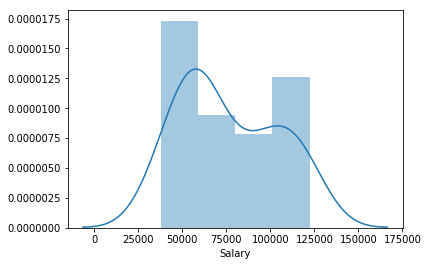

In [ ]:
## Distribution of salary
sns.distplot(salaries['Salary']);

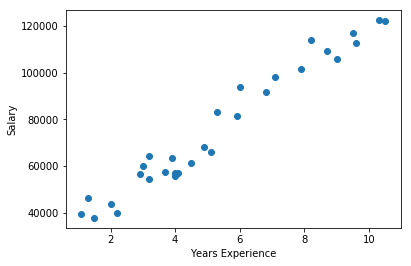

In [ ]:
plt.scatter(salaries['YearsExperience'], salaries['Salary']);
plt.xlabel('Years Experience')
plt.ylabel('Salary');

## Years Experience is correlated with Salary so that we can use Years Experience to predict Salary

## 3. Split data into train and test set

In [ ]:
print(type(salaries[['YearsExperience']]))
print(type(salaries['YearsExperience']))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
from sklearn.model_selection import train_test_split
X = salaries[['YearsExperience']]
y = salaries['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

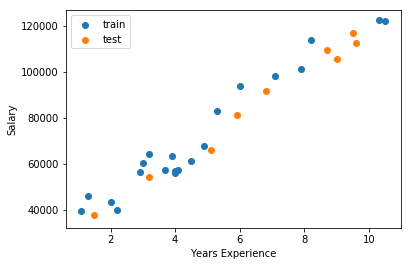

In [ ]:
# Plot train set
plt.scatter(x=X_train, y=y_train, label='train')
# Plot test set
plt.scatter(x=X_test, y=y_test, label='test')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.legend();

## 4. Create model

In [ ]:
from sklearn.linear_model import LinearRegression
# Create linear regression model
lr = LinearRegression()

In [ ]:
# Train model with train set
lr.fit(X=X_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

$Salary=b_0+b_1*YearsExperience$

In [ ]:
# b1
lr.coef_

array([9577.17174975])

In [ ]:
# b0
lr.intercept_

25975.814659541138

In [ ]:
# Use trained model to make prediction
predict_test = lr.predict(X=X_test)

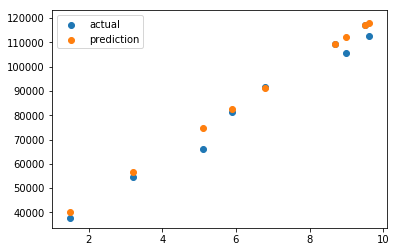

In [ ]:
# plot our prediction value
plt.scatter(X_test, y_test, label='actual')
plt.scatter(X_test, predict_test, label='prediction')
plt.legend();

## 5. Evaluate model

In [ ]:
# calculate MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, predict_test))
# question here ?? calculate RMSE

17978409.49734413


## 6. Extra Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X_train.head()

,YearsExperience
28,10.3
10,3.9
3,2.0
1,1.3
19,6.0


$Salary=b_0+b_1*YearsExperience$

Polynomial Regression

$Salary=b_0+b_1*YearsExperience+b_2*YearsExperience^2$

In [ ]:
poly_model = PolynomialFeatures(degree=2)

In [ ]:
# Transform data from x -> x, x^2
X_train_poly = poly_model.fit_transform(X_train)
X_test_poly  = poly_model.fit_transform(X_test)

In [ ]:
X_train_poly
# [x^0 , x^1, x^2]

array([[  1.  ,  10.3 , 106.09],
       [  1.  ,   3.9 ,  15.21],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   1.3 ,   1.69],
       [  1.  ,   6.  ,  36.  ],
       [  1.  ,   7.9 ,  62.41],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   2.9 ,   8.41],
       [  1.  ,   4.5 ,  20.25],
       [  1.  ,   1.1 ,   1.21],
       [  1.  ,   7.1 ,  50.41],
       [  1.  ,   2.2 ,   4.84],
       [  1.  ,   3.2 ,  10.24],
       [  1.  ,   4.1 ,  16.81],
       [  1.  ,   3.7 ,  13.69],
       [  1.  ,   4.9 ,  24.01],
       [  1.  ,  10.5 , 110.25],
       [  1.  ,   8.2 ,  67.24],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   5.3 ,  28.09],
       [  1.  ,   4.  ,  16.  ]])

In [ ]:
# Train poly regression model
# Linear Regression model trains with poly features
poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
print(poly_lr.coef_)
print(poly_lr.intercept_)

[   0.         9313.9762626    22.73262965]
26557.223350824344


In [ ]:
# Make prediction
poly_prediction = poly_lr.predict(X_test_poly)

In [ ]:
poly_prediction

array([ 90943.41873142, 109309.44957349,  56594.72951873,  82301.0061382 ,
        40579.33616143, 118066.43462014, 117091.61767125,  74649.77798722,
       112224.35271571])

In [ ]:
# That's all for today!!